In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
std_stat = 3/4
#   Нулевая гипотеза - уровень стресса не отличается
#   Альтернатива - больше или меньше
#   Статистика - сам уровень стресса

In [3]:
n = 100
model = stats.binom(n, std_stat)

0.08222258891386608

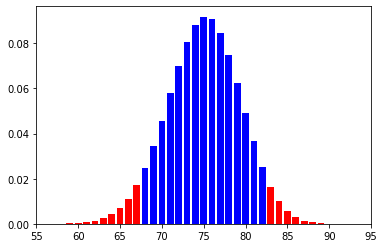

In [4]:
plt.bar(np.linspace(1,100, 100), model.pmf(np.linspace(1,100, 100)),align='center', color='b')
plt.bar(np.linspace(83,100, 18), model.pmf(np.linspace(83,100, 18)), align='center', color='r')
plt.bar(np.linspace(0,67, 68), model.pmf(np.linspace(0,67, 68)), align='center', color='r')
plt.xlim(55, 95)
stats.binom_test(67,100,3/4, alternative='two-sided')

In [5]:
data = pd.read_csv('pines.txt', header=0, sep='\t')
data

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4
...,...,...
579,169.1,160.0
580,162.5,157.3
581,156.7,155.3
582,154.1,150.8


In [6]:
ret = stats.binned_statistic_2d(data.sn, data.we,values=None, statistic='count', bins=5)

In [7]:
tree_array = ret.statistic.flatten().astype(int)
len(tree_array)

25

In [8]:
np.bincount(tree_array)

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2])

In [9]:
#   Скорее всего неправильно
#   А оказалось правильно
print(f"Mean = {tree_array.mean()}")

Mean = 23.36


In [28]:
#   равномерное распределение
uniform = stats.uniform()

In [11]:
#   Критерий согласия Пирсона

In [12]:
#uniform = stats.uniform(min(tree_array), max(tree_array))
expected_frequencies = [len(data) * uniform. for x in range(min(data), max(data) + 1)]

In [48]:
stats.chisquare(tree_array, ddof = 0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)